In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [39]:
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [40]:
# celeb_a = tfds.load('celeb_a')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# celeba의 정보중 이용할 데이터만 추출
celeb_a = np.load('/content/drive/MyDrive/패스트캠퍼스/dataset/celeba_small.npz')
print(celeb_a.files)
celeb_a.keys()

# celeb_a = tfds.load('celeb_a')

['train_images', 'train_labels', 'test_images', 'test_labels']


KeysView(<numpy.lib.npyio.NpzFile object at 0x7f86494b3e10>)

In [42]:
# import imageio
# from skimage.transform import resize

# celeb_a_train, celeb_a_test = celeb_a['validation'], celeb_a['test']

# train_images = []
# train_labels = []

# for tensor in tfds.as_num(celeb_a_train):
# # .as_num 은 celeb_a_train 데이터를 numpy 형태로 바꿔서 넣어주는 것
#     isMale = tensor['attributes']['Male']
#     isSmiling = tensor['attributes']['Smiling']

#     label = np.array([isMale, isSmiling]).astype(np.int8) #0이나 1로 바뀜.
    
#     img = resize(tensor['image']), (190//1.5, 89//1.5)

#     train_images.append(img)
#     train_labels.append(label)

# test_images = []
# test_labels = []

# for tensor in tfds.as_num(celeb_a_test):
# # .as_num 은 celeb_a_train 데이터를 numpy 형태로 바꿔서 넣어주는 것
#     isMale = tensor['attributes']['Male']
#     isSmiling = tensor['attributes']['Smiling']

#     label = np.array([isMale, isSmiling]).astype(np.int8) #0이나 1로 바뀜.
    
#     img = resize(tensor['image']), (190//1.5, 89//1.5)

#     test_images.append(img)
#     test_labels.append(label)

celeb_a_train_images, celeb_a_test_images = celeb_a['train_images'], celeb_a['test_images']
celeb_a_train_labels, celeb_a_test_labels = celeb_a['train_labels'], celeb_a['test_labels']

In [43]:
# 데이터량 축소
# m_s = []
# f_s = []
# m_n = []
# f_n = []
# for a,b in zip(test_images, test_labels):
#     if b[0] and b[1]:
#         m_s.append((a,b))
#     elif not b[0] and b[1]:
#         f_s.append((a,b))
#     elif b[0] and not b[1]:
#         m_n.append((a,b))
#     elif not b[0] and not b[1]:
#         f_n.append((a,b))
# len(m_s),len(f_s),len(m_n),len(m_n)
# total = m_s[:550] + f_s[:550] + m_n[:550] + f_n[:550]
# len(total)
# import random
# random.shuffle(total)
# trains = total[:2000]
# test = total[2000:]


# train_images, train_labels = list(zip(*trains))
# test_images, test_labels = list(zip(*test))

# train_images = np.array(train_images)
# train_labels = np.array(train_labels)
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)



len(celeb_a_train_images), len(celeb_a_test_images)

(2000, 200)

In [44]:
# 190//1.5,89//1.5

In [45]:
x=celeb_a['train_images'][0]
y=celeb_a['train_labels'][0]

In [46]:
x.shape,y.shape

((72, 59, 3), (2,))

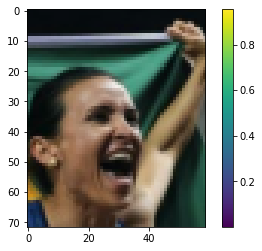

[0 0]


In [47]:
plt.figure()
plt.imshow(x)
plt.colorbar()
plt.show()

print(y)

In [48]:
train_images = celeb_a['train_images']
train_labels = celeb_a['train_labels']

test_images = celeb_a['test_images']
test_labels = celeb_a['test_labels']

In [49]:
train_images[train_images != 0][:19]

array([0.02352941, 0.04313725, 0.05490196, 0.01960784, 0.03921569,
       0.05490196, 0.01977401, 0.03921569, 0.05114656, 0.02352941,
       0.03921569, 0.05490196, 0.02745098, 0.04313725, 0.05882353,
       0.02745098, 0.04313725, 0.05882353, 0.02745098])

In [50]:
train_images.dtype

dtype('float64')

In [51]:
print(train_images.shape, test_images.shape)
print(train_images.dtype, test_images.dtype)
print()
print(train_labels.shape, test_labels.shape)
print(train_labels.dtype, test_labels.dtype)
print()
print(train_images[train_images !=0][:10])
print(test_images[test_images !=0][:10])

(2000, 72, 59, 3) (200, 72, 59, 3)
float64 float64

(2000, 2) (200, 2)
int8 int8

[0.02352941 0.04313725 0.05490196 0.01960784 0.03921569 0.05490196
 0.01977401 0.03921569 0.05114656 0.02352941]
[0.52571083 0.90221419 0.8707544  0.56460618 0.95304088 0.91372549
 0.55277501 0.94885344 0.90571618 0.55756065]


In [52]:
print(train_labels[0])
print(test_labels[0])

[0 0]
[1 1]


In [53]:
from tensorflow.keras.utils import to_categorical
train_male_labels, train_smile_labels = np.split(train_labels,2,axis=1)
test_male_labels,test_smile_labels = np.split(test_labels,2,axis=1)
print(train_male_labels.shape, train_smile_labels.shape)
print(train_male_labels[0])
print(train_smile_labels[0])
print()
print(test_male_labels[0])
print(test_smile_labels[0])

(2000, 1) (2000, 1)
[0]
[0]

[1]
[1]


In [54]:
train_male_labels = to_categorical(train_male_labels)
train_smile_labels = to_categorical(train_smile_labels)
test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)

In [55]:
print(train_male_labels.shape, train_smile_labels.shape)
print(test_male_labels.shape, test_smile_labels.shape)
print(train_male_labels[0])

(2000, 2) (2000, 2)
(200, 2) (200, 2)
[1. 0.]


In [56]:
train_label2 = np.concatenate([train_male_labels,train_smile_labels],axis=1)
test_label2 = np.concatenate([test_male_labels,test_smile_labels],axis=1)

In [58]:
print(train_label2.shape)

(2000, 4)


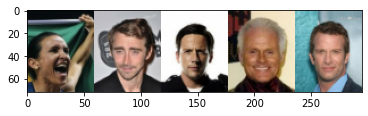

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]]


In [60]:
plt.imshow(np.hstack(train_images[:5]))
plt.show()
print(train_label2[:5])

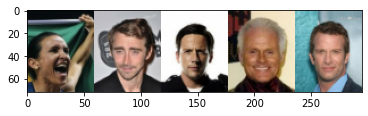

In [61]:
plt.imshow(train_images[:5].transpose((1,0,2,3)).reshape((72,-1,3)))
plt.show()

In [62]:
train_images.shape

(2000, 72, 59, 3)

In [63]:
for male, smile in zip(train_male_labels[:5],train_smile_labels[:5]):
    print(male,smile)

[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]


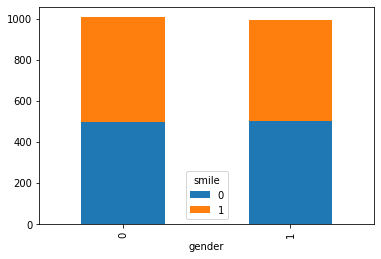

In [66]:
df = pd.DataFrame(train_labels, columns = ['gender','smile'])
df.groupby(['gender','smile']).size().unstack().plot(kind='bar',stacked=True)

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input, Flatten

def simple_model():
    inputs = Input((72,59,3))

    x = Conv2D(32,3,activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64,3,activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(32,3,activation='relu')(x)
    x = MaxPool2D(2)(x)

    x = Flatten()(x)
    x = Dense(64,activation='relu')(x)

    outputs = Dense(2,activation='softmax')(x)
    model = Model(inputs,outputs)
    return model

In [70]:
gender_model = simple_model()
smile_model = simple_model()

In [71]:
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 11, 32)        18464 

In [72]:
smile_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 11, 32)        1846

In [74]:
gender_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
smile_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [75]:
gender_hist = gender_model.fit(train_images, train_male_labels, validation_data = (test_images, test_male_labels),epochs = 15, verbose = 1)

Epoch 1/15
63/63 [==============================] - 22s 307ms/step - loss: 0.5955 - accuracy: 0.6745 - val_loss: 0.5285 - val_accuracy: 0.7350
Epoch 2/15
63/63 [==============================] - 19s 297ms/step - loss: 0.4781 - accuracy: 0.7830 - val_loss: 0.5026 - val_accuracy: 0.7450
Epoch 3/15
63/63 [==============================] - 19s 299ms/step - loss: 0.4027 - accuracy: 0.8275 - val_loss: 0.4386 - val_accuracy: 0.8100
Epoch 4/15
63/63 [==============================] - 18s 293ms/step - loss: 0.3015 - accuracy: 0.8700 - val_loss: 0.3575 - val_accuracy: 0.8650
Epoch 5/15
63/63 [==============================] - 19s 296ms/step - loss: 0.2177 - accuracy: 0.9165 - val_loss: 0.2875 - val_accuracy: 0.8800
Epoch 6/15
63/63 [==============================] - 20s 315ms/step - loss: 0.1666 - accuracy: 0.9310 - val_loss: 0.2655 - val_accuracy: 0.9050
Epoch 7/15
63/63 [==============================] - 20s 314ms/step - loss: 0.1396 - accuracy: 0.9425 - val_loss: 0.2405 - val_accuracy: 0.9100

In [78]:
smile_hist = smile_model.fit(train_images, train_smile_labels, validation_data = (test_images, test_smile_labels),epochs = 15,verbose=1)

Epoch 1/15
63/63 [==============================] - 20s 310ms/step - loss: 0.6963 - accuracy: 0.5295 - val_loss: 0.6831 - val_accuracy: 0.6150
Epoch 2/15
63/63 [==============================] - 18s 283ms/step - loss: 0.6608 - accuracy: 0.6125 - val_loss: 0.6132 - val_accuracy: 0.6650
Epoch 3/15
63/63 [==============================] - 17s 275ms/step - loss: 0.6034 - accuracy: 0.6700 - val_loss: 0.5551 - val_accuracy: 0.7100
Epoch 4/15
63/63 [==============================] - 19s 303ms/step - loss: 0.4794 - accuracy: 0.7670 - val_loss: 0.3876 - val_accuracy: 0.8000
Epoch 5/15
63/63 [==============================] - 18s 293ms/step - loss: 0.3553 - accuracy: 0.8465 - val_loss: 0.3133 - val_accuracy: 0.8700
Epoch 6/15
63/63 [==============================] - 18s 289ms/step - loss: 0.3044 - accuracy: 0.8720 - val_loss: 0.3140 - val_accuracy: 0.8550
Epoch 7/15
63/63 [==============================] - 19s 306ms/step - loss: 0.2719 - accuracy: 0.8815 - val_loss: 0.3079 - val_accuracy: 0.8750

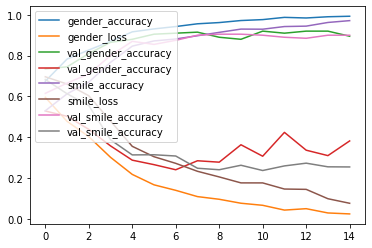

In [79]:
plt.plot(gender_hist.history['accuracy'],label = 'gender_accuracy')
plt.plot(gender_hist.history['loss'],label = 'gender_loss')
plt.plot(gender_hist.history['val_accuracy'],label = 'val_gender_accuracy')
plt.plot(gender_hist.history['val_loss'],label = 'val_gender_accuracy')

plt.plot(smile_hist.history['accuracy'],label = 'smile_accuracy')
plt.plot(smile_hist.history['loss'],label = 'smile_loss')
plt.plot(smile_hist.history['val_accuracy'],label = 'val_smile_accuracy')
plt.plot(smile_hist.history['val_loss'],label = 'val_smile_accuracy')

plt.legend(loc='upper left')
plt.show()